<h1><b>Student Performence Clustering</b></h1>
<h5>Name : Rejey Ezekiel
</br>Class : DAAA/FT/1B/01
</br>Admin No. : 2348935</h5>

<h5><b>Background Info:</b></h5>
We collected the information of 1000 students including their age, gender and subject
scores. We want to group the students into multiple clusters so that we can cater needs
for different students.
By the end of this study, you would be able to answer below questions.
How to perform student segmentation using unsupervised machine learning
algorithm in Python?
<li>Describe the characteristics of each student cluster.</li>
<li>Which group of students needs to be more attention to?</li>
</br>

<hr>
<h3>Importing Libraries</h3>
<hr></hr>

In [806]:
# Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Sklearn Libraries
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import sklearn
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Others
from typing import Sequence, Tuple
from itertools import combinations, chain

sns.set_theme(palette='colorblind')

In [807]:
df = pd.read_csv('./Dataset/Student_Performance_dataset.csv',index_col=0)

In [808]:
df['Gender'].unique()

array(['Female', 'Male', 'Genderqueer', 'Non-binary', 'Agender',
       'Bigender', 'Genderfluid', 'Polygender'], dtype=object)

In [809]:
df

,Gender,Age,English_Score,Math_Score,Science_Score
Student_ID,,,,,
1,Female,18,64.0,56.0,60
2,Female,12,89.0,71.0,97
3,Female,18,69.0,69.0,80
4,Female,17,60.0,72.0,97
5,Male,13,71.0,76.0,76
...,...,...,...,...,...
996,Female,14,64.0,55.0,77
997,Genderqueer,14,66.0,60.0,56
998,Male,16,82.0,81.0,74


<hr></hr>
<h3>Exploratory Data Analysis</h3>
<hr></hr>

We will begin by conducting an exploratory data analysis of the data, to gain a better understanding of the characteristics of the dataset. However, we will mainly be focusing on how each feature relates to the target variable as predicting the target is our focus. This is also important so we can know how to proceed with feature engineering.

This is a dataset collected from a mall, and it contains 1000 data points with 5 columns.

<ul>
<li><b>Gender:</b> students gender</li>
<li><b>Age:</b> Students age</li>
<li><b>English Score :</b> Students score on English test</li>
<li><b>Math Score:</b> Students score on Math test</li>
<li><b>Science Score:</b> Students score on Science test</li>
<ul>

In [810]:
df.shape

(1000, 5)

In [811]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         1000 non-null   object 
 1   Age            1000 non-null   int64  
 2   English_Score  971 non-null    float64
 3   Math_Score     967 non-null    float64
 4   Science_Score  1000 non-null   int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 46.9+ KB


In [812]:
df.isnull().sum()

Gender            0
Age               0
English_Score    29
Math_Score       33
Science_Score     0
dtype: int64

In [813]:
df.describe()

,Age,English_Score,Math_Score,Science_Score
count,1000.000000,971.000000,967.000000,1000.000000
mean,14.970000,76.089598,76.660807,76.370000
std,1.959832,12.767113,12.541226,12.866649
min,12.000000,55.000000,55.000000,55.000000
25%,13.000000,65.000000,66.000000,65.000000
50%,15.000000,76.000000,76.000000,77.000000
75%,17.000000,88.000000,87.500000,87.000000
max,18.000000,98.000000,98.000000,98.000000


<b><u>Observations</u></b>

<ul>
<li>The shape of the dataset is (1000,5) whereby there is 1000 observations and 5 features </li>
<li>Datatypes of all features are numerical except Gender</li>
<li>There appears to be some missing values in the English and Math tests/</li>
</ul>

<h4>Univariate Analysis</h4>

We will begin with a univariate analysis, analysing the distribution of each variable.

<h5>Distribution of numerical features</h5>

We will plot and see the distribution of the different numerical variables. To do this, we use histplots and barplots.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

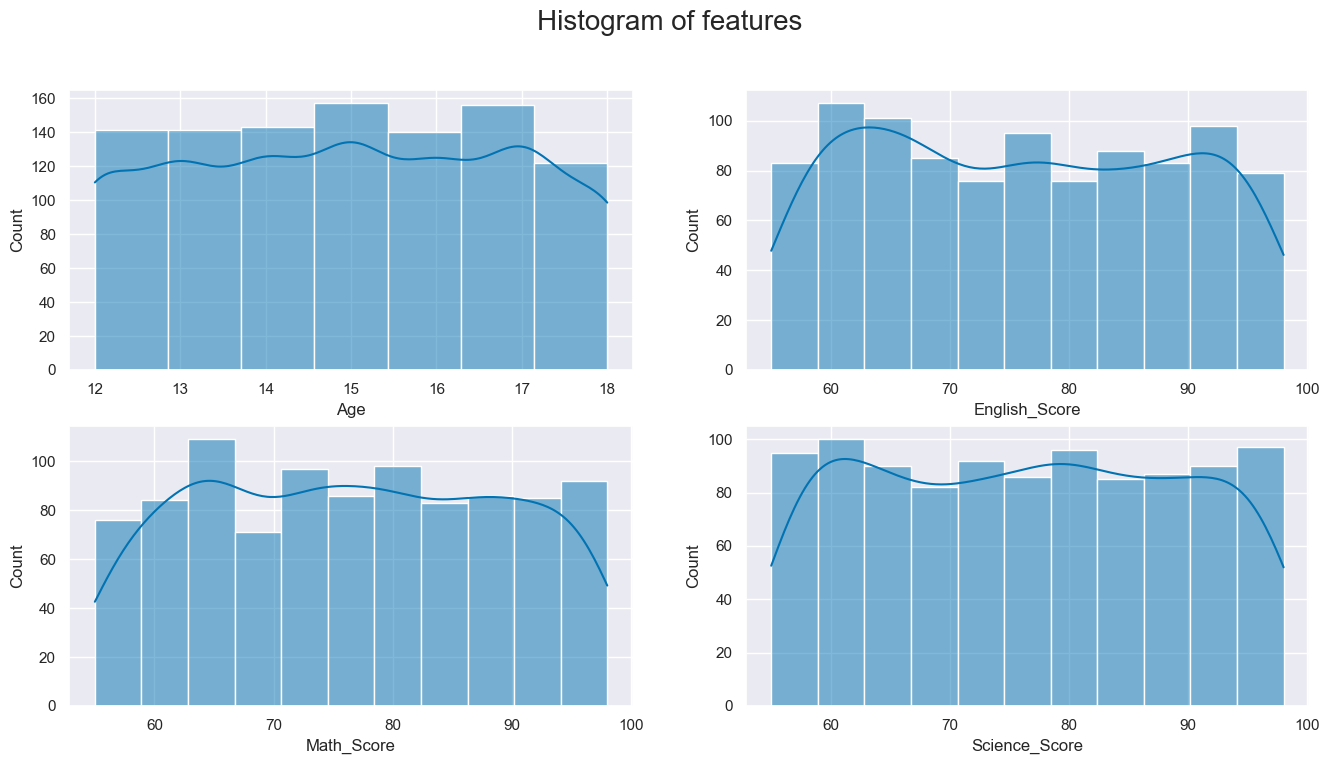

In [814]:
# Histplot 
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

sns.histplot(data=df, x='Age', ax=ax[0,0], kde=True, bins=7)
sns.histplot(data=df, x='English_Score', ax=ax[0,1], kde=True)
sns.histplot(data=df, x='Math_Score', ax=ax[1,0], kde=True)
sns.histplot(data=df, x='Science_Score', ax=ax[1,1,], kde=True)
plt.suptitle('Histogram of features', fontsize=20)

plt.show()

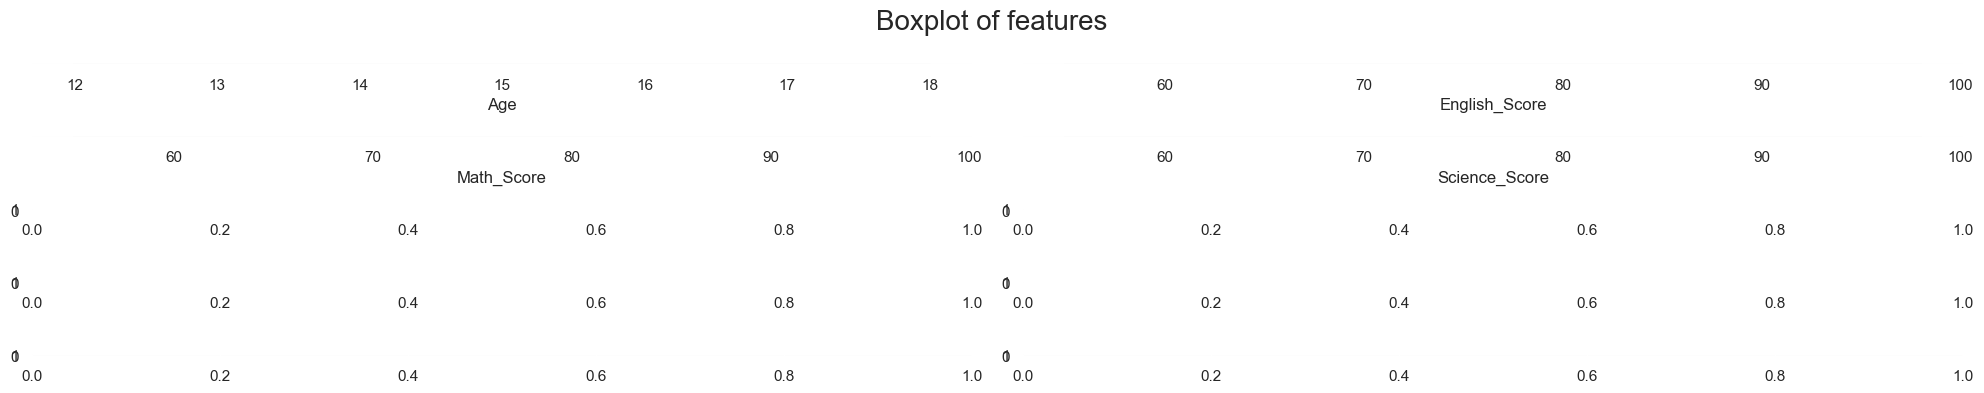

In [815]:
# Boxplots
fig, axes = plt.subplots(5, 2,tight_layout=False, figsize=(20, 4))
for ax, col in zip(axes.flatten(), df.drop(columns='Gender').columns):
    sns.boxplot(data=df, x=col, ax = ax, color='skyblue')
plt.suptitle('Boxplot of features', fontsize=20)
plt.show()

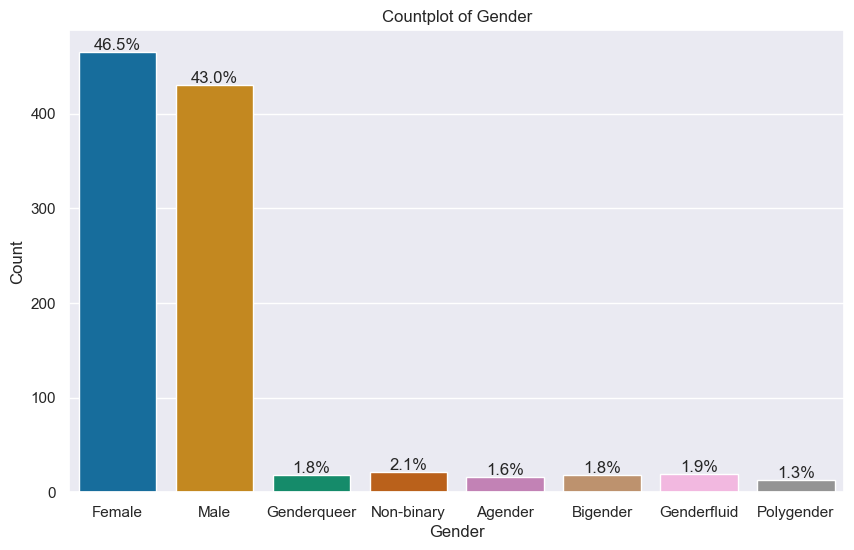

In [816]:
# Calculate the percentage of each gender
percentages = df['Gender'].value_counts(normalize=True) * 100

# Plot the countplot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Gender')

# Add percentages as text labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/len(df)*100:.1f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

ax.set(xlabel='Gender', ylabel='Count')
plt.title('Countplot of Gender')
plt.show()

<b><u>Observations</u></b>

<ul>
<li>44% of our customers are male, while most of our customers are females (56% of customers). According to data.worldbank, 47.7% of the population in Singapore is female. Hence, the demographics of our mall does not appear to reflect societal demographics</li>
<li>Given the male-female ratio of the mall, it may be advantageous to ensure that there are anemenities and shops cater more towards women</li>
</ul>


<h5>Bivariate Analysis</h5>

We will now analyse the relationships between the different variables.

<h5>Pairplot</h5>

Since our feature space is relatively small, we can afford to plot out a Pairplot to visualise the relationship between variables.

c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-

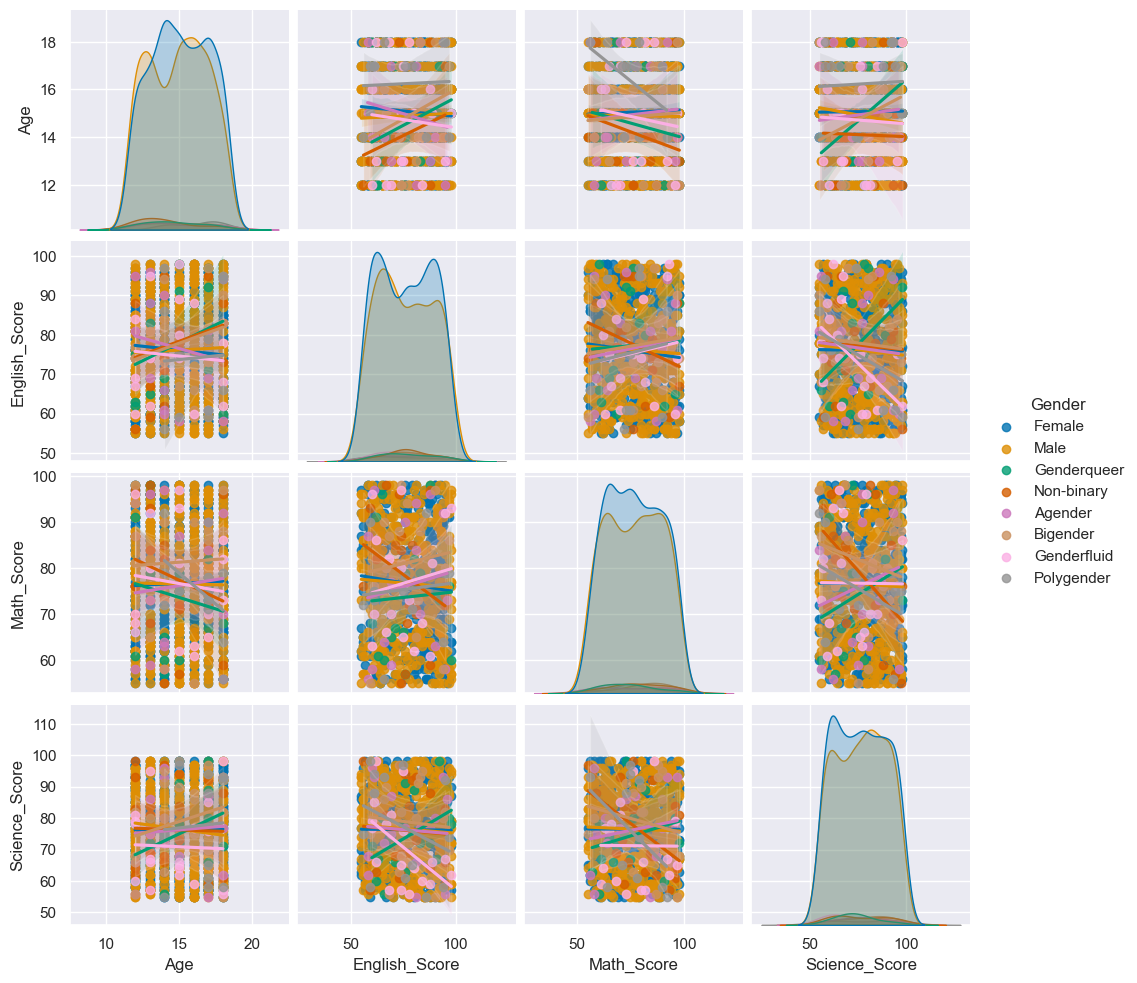

In [817]:
sns.pairplot(df, kind='reg', hue='Gender')
plt.show()

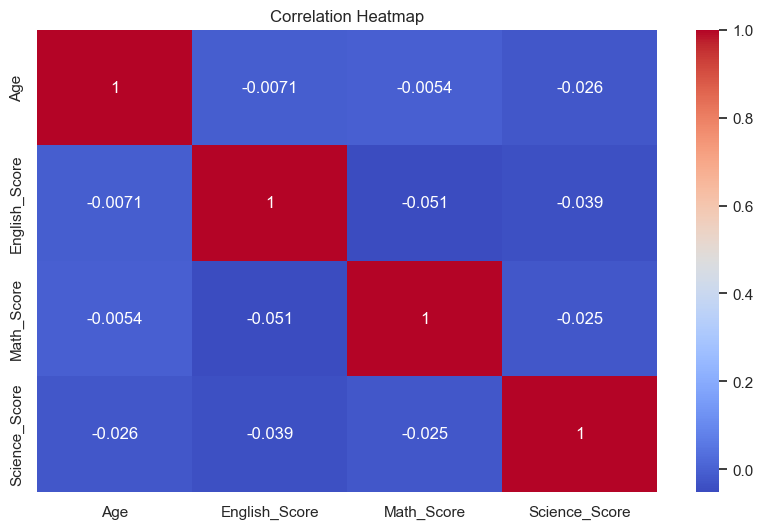

In [818]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns='Gender').corr(), annot=True, cmap='coolwarm').set_title('Correlation Heatmap')
plt.show()

<hr></hr>
<h3>Data Preprocessing & Feature Engineering</h3>
<hr></hr>

There are 3 preprocessing steps that we shall perform, before proceeding to the actual clutering, which are:

<ol>
<li>Standard Scaling of the datapoints to ensure all attributes are in the same scale</li>
<li>Producing a dichotomous variable that models can understand</li>
<li>Handling the categorical feature</li>
</ol>


In [819]:
numCols = ['Age', 'English_Score', 'Math_Score', 'Science_Score']

<h4>1. Missing Values</h4>

Dealing with missing values in 2 columns using 

In [820]:
cols = ['English_Score', 'Math_Score']
imputer = KNNImputer()
df.loc[:,cols] = imputer.fit_transform(df[cols])

<h4>2. Feature Engineering</h4>

In [821]:
# One Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Verifying the change
df.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender
Student_ID,,,,,,,,,,,
1,18,64.0,56.0,60,False,True,False,False,False,False,False
2,12,89.0,71.0,97,False,True,False,False,False,False,False
3,18,69.0,69.0,80,False,True,False,False,False,False,False
4,17,60.0,72.0,97,False,True,False,False,False,False,False
5,13,71.0,76.0,76,False,False,False,False,True,False,False


In [822]:
df['Mean_Score'] = df[['English_Score', 'Math_Score', 'Science_Score']].mean(axis=1)


In [823]:
df

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender,Mean_Score
Student_ID,,,,,,,,,,,,
1,18,64.0,56.0,60,False,True,False,False,False,False,False,60.000000
2,12,89.0,71.0,97,False,True,False,False,False,False,False,85.666667
3,18,69.0,69.0,80,False,True,False,False,False,False,False,72.666667
4,17,60.0,72.0,97,False,True,False,False,False,False,False,76.333333
5,13,71.0,76.0,76,False,False,False,False,True,False,False,74.333333
...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,64.0,55.0,77,False,True,False,False,False,False,False,65.333333
997,14,66.0,60.0,56,False,False,False,True,False,False,False,60.666667
998,16,82.0,81.0,74,False,False,False,False,True,False,False,79.000000


In [824]:
df_view = df.copy()

<h4>3. Standard Scaling</h4>

In [825]:
# Defining scaler
scaler = StandardScaler()

arr = ['Age', 'English_Score', 'Math_Score', 'Science_Score']

# Scaling the dataset
df[arr] = scaler.fit_transform(df[arr])

# Verifying the change
df.head()

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender,Mean_Score
Student_ID,,,,,,,,,,,,
1,1.546825,-0.960065,-1.666859,-1.272918,False,True,False,False,False,False,False,60.000000
2,-1.516194,1.023610,-0.454347,1.604172,False,True,False,False,False,False,False,85.666667
3,1.546825,-0.563330,-0.616015,0.282266,False,True,False,False,False,False,False,72.666667
4,1.036321,-1.277454,-0.373512,1.604172,False,True,False,False,False,False,False,76.333333
5,-1.005691,-0.404636,-0.050176,-0.028771,False,False,False,False,True,False,False,74.333333


In [826]:
inertia = []
score = []
centroid = []
silhouettes_value = []
for k in range(2, 14):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df)
    label = kmeans.predict(df)
    inertia.append(np.sqrt(kmeans.inertia_))
    centroid.append(kmeans.cluster_centers_)
    score.append(silhouette_score(df, label))
    silhouettes_value.append(silhouette_samples(df, label))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

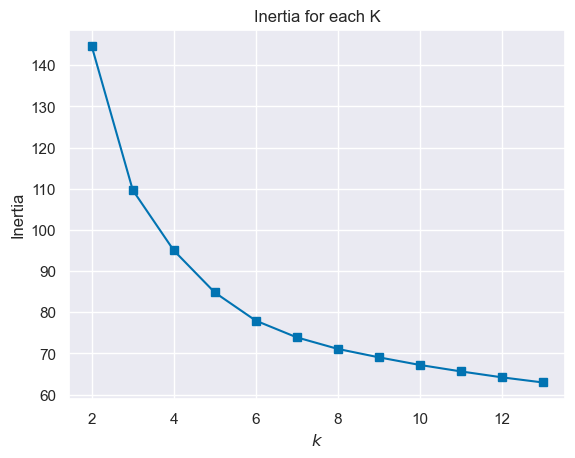

In [827]:
plt.plot(range(2, 14), inertia, marker="s")
plt.title("Inertia for each K")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

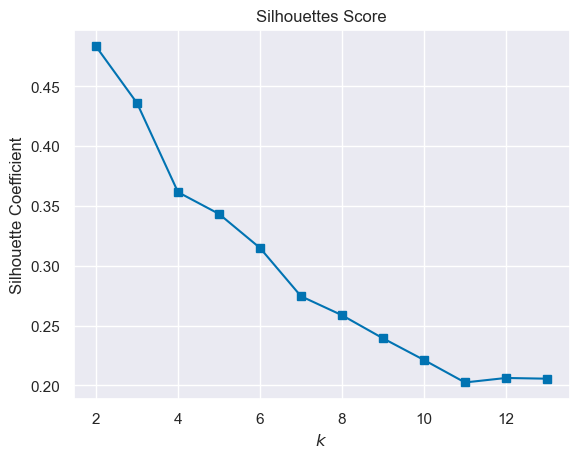

In [828]:
plt.plot(range(2, 14), score, marker="s")
plt.title("Silhouettes Score")
plt.xlabel("$k$")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [829]:
from sklearn.manifold import TSNE

optimal_perplexity = round(np.sqrt(df[numCols].shape[0]))
tsne = TSNE(learning_rate=50, perplexity=optimal_perplexity, random_state=42)
tsne_features = pd.DataFrame(tsne.fit_transform(df))
tsne_features

,0,1
0,-72.524788,0.004855
1,52.326019,-4.760466
2,-24.030094,-9.421806
3,0.231126,-11.209736
4,-11.418967,-3.412483
...,...,...
995,-62.264030,3.093305
996,-71.381165,2.462668
997,15.345397,-1.156121
998,-57.212376,1.335494


In [830]:
t_inertia = []
t_score = []
t_centroid = []
t_silhouettes_value = []
for k in range(2, 24):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(tsne_features)
    label = kmeans.predict(tsne_features)
    t_inertia.append(np.sqrt(kmeans.inertia_))
    t_centroid.append(kmeans.cluster_centers_)
    t_score.append(silhouette_score(tsne_features, label))
    t_silhouettes_value.append(silhouette_samples(tsne_features, label))

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

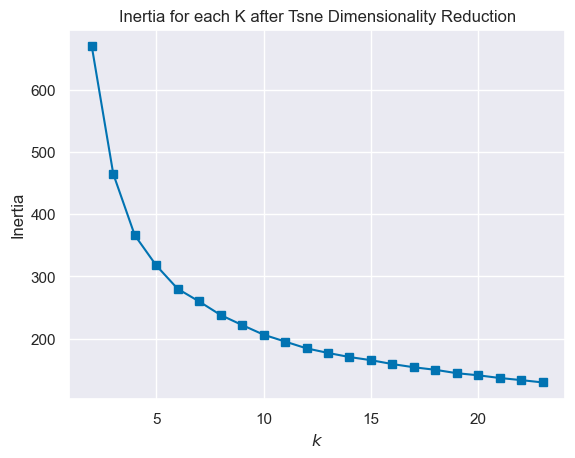

In [831]:
plt.plot(range(2, 24), t_inertia, marker="s")
plt.title("Inertia for each K after Tsne Dimensionality Reduction")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.show()

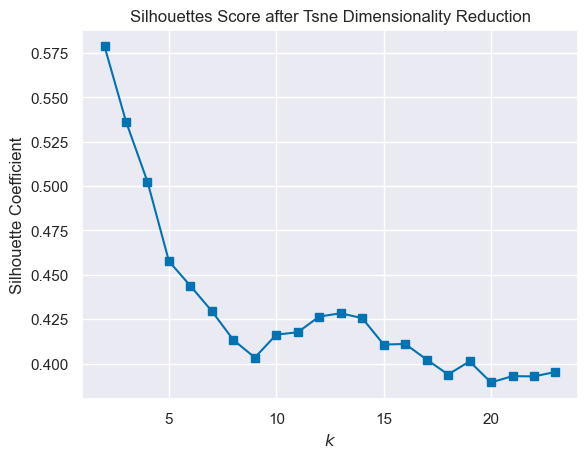

In [832]:
plt.plot(range(2, 24), t_score, marker="s")
plt.title("Silhouettes Score after Tsne Dimensionality Reduction")
plt.xlabel("$k$")
plt.ylabel("Silhouette Coefficient")
plt.show()

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


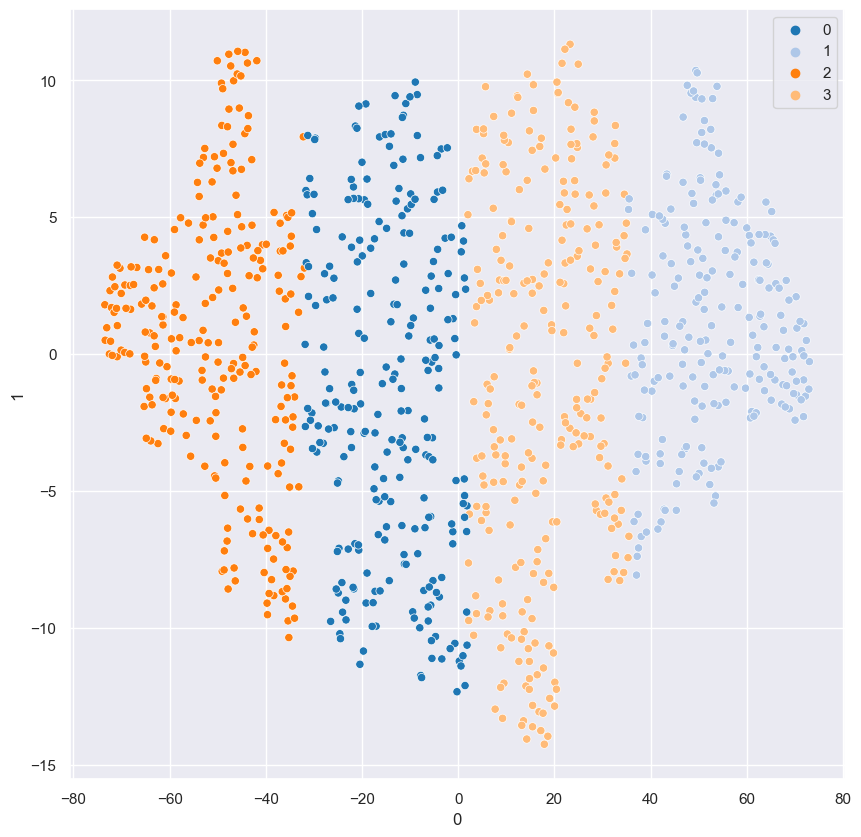

In [833]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(tsne_features)
kmeans_label = kmeans.predict(tsne_features)
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans_label,
    palette="tab20",
)
plt.show()

In [834]:
silhouettes_avg = silhouette_score(tsne_features, kmeans_label)
print(silhouettes_avg)

0.50257015


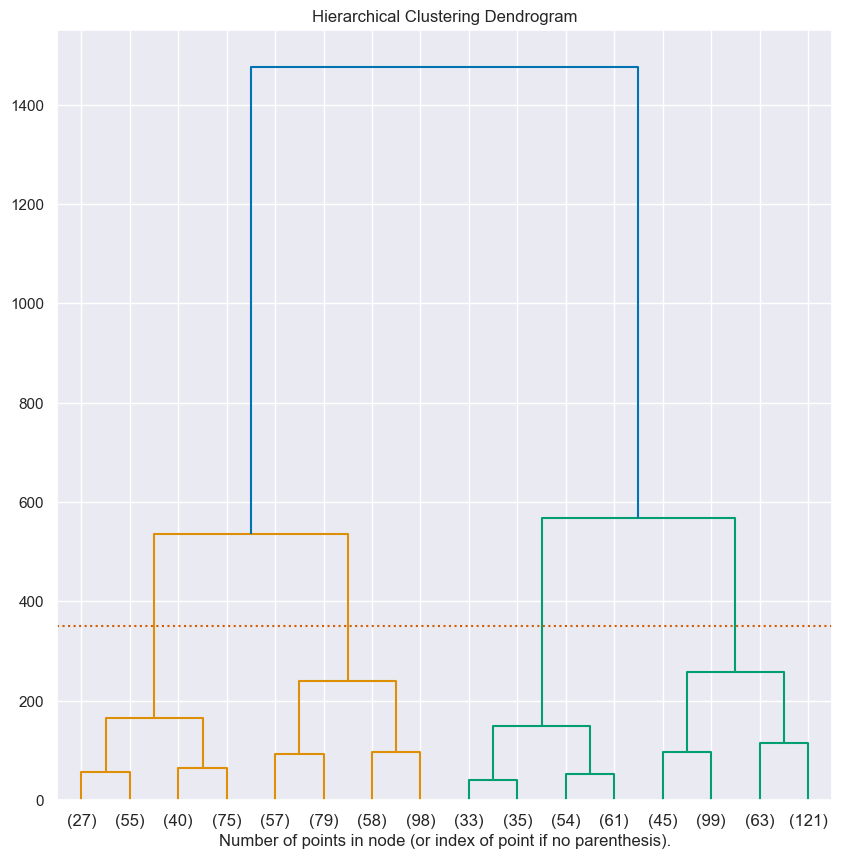

In [835]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.figure(figsize=(10, 10))
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(tsne_features)
plt.title("Hierarchical Clustering Dendrogram")

plot_dendrogram(model, truncate_mode="level", p=3)  # Select top 3 level
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.hlines(350, 0, 300, colors="r", linestyle=":")
plt.show()

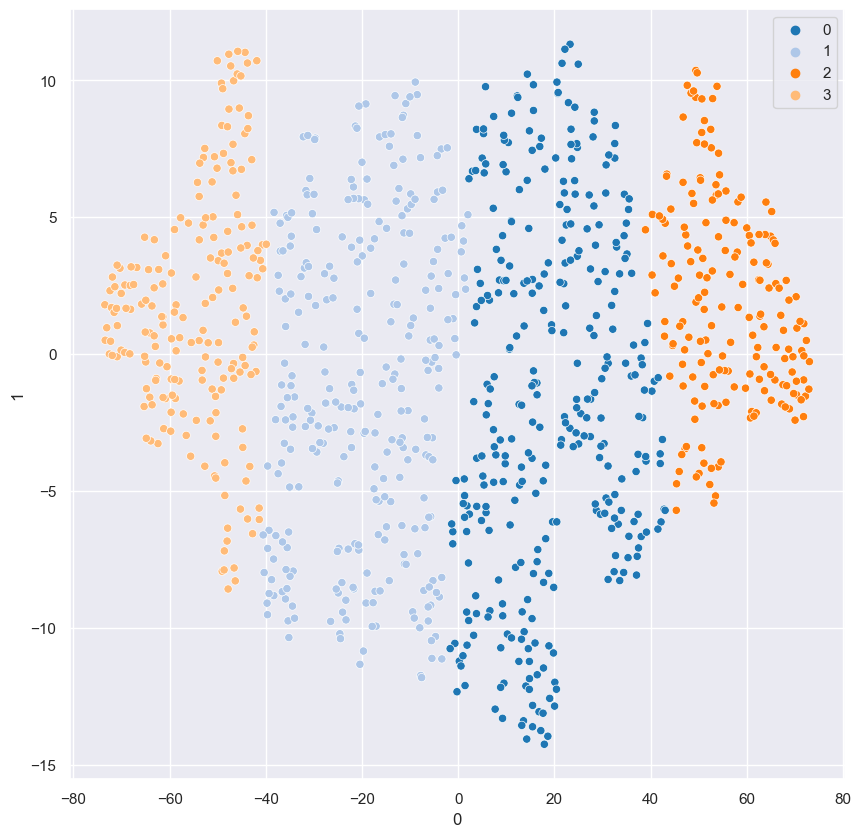

In [836]:
# Setting Number of Cluster to 6
agg_cluster_6 = AgglomerativeClustering(n_clusters=4)

agg_labels = agg_cluster_6.fit_predict(tsne_features)

plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=agg_labels,
    palette="tab20",
)
plt.show()

In [837]:
silhouette_score(tsne_features, agg_labels)


0.48581693

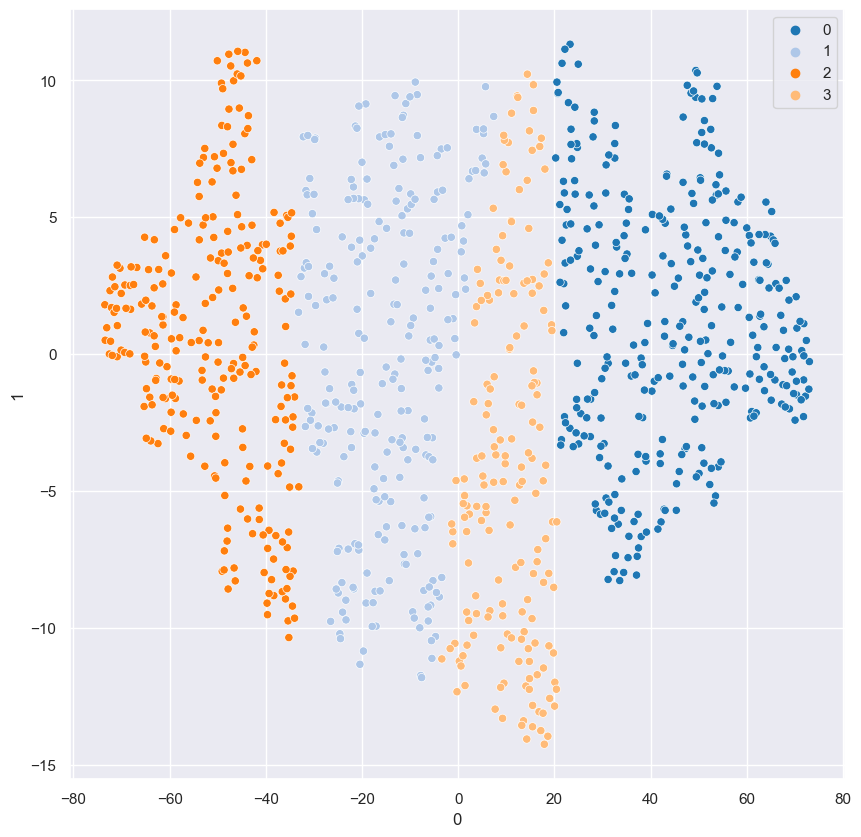

In [838]:
from sklearn.cluster import SpectralClustering

spec_cluster_4 = SpectralClustering(
    n_clusters=4, assign_labels="discretize", random_state=0
).fit(tsne_features)

spec_labels = spec_cluster_4.labels_
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=spec_labels,
    palette="tab20",
)
plt.show()

In [839]:
silhouette_score(tsne_features, spec_labels)


0.44469556

c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


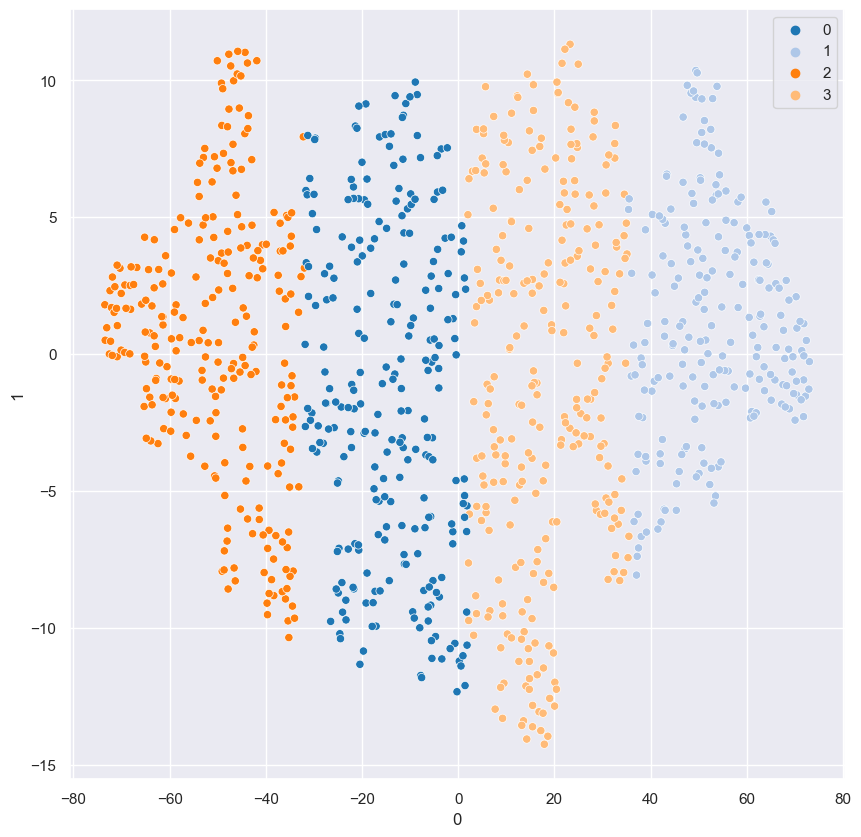

In [840]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(tsne_features)
kmeans_label = kmeans.predict(tsne_features)
df_view["Cluster"] = kmeans_label
plt.figure(figsize=(10, 10))
sns.scatterplot(
    x=tsne_features.iloc[:, 0],
    y=tsne_features.iloc[:, 1],
    hue=kmeans_label,
    palette="tab20",
)
plt.show()


In [841]:
df_view

,Age,English_Score,Math_Score,Science_Score,Gender_Bigender,Gender_Female,Gender_Genderfluid,Gender_Genderqueer,Gender_Male,Gender_Non-binary,Gender_Polygender,Mean_Score,Cluster
Student_ID,,,,,,,,,,,,,
1,18,64.0,56.0,60,False,True,False,False,False,False,False,60.000000,2
2,12,89.0,71.0,97,False,True,False,False,False,False,False,85.666667,1
3,18,69.0,69.0,80,False,True,False,False,False,False,False,72.666667,0
4,17,60.0,72.0,97,False,True,False,False,False,False,False,76.333333,0
5,13,71.0,76.0,76,False,False,False,False,True,False,False,74.333333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,14,64.0,55.0,77,False,True,False,False,False,False,False,65.333333,2
997,14,66.0,60.0,56,False,False,False,True,False,False,False,60.666667,2
998,16,82.0,81.0,74,False,False,False,False,True,False,False,79.000000,3


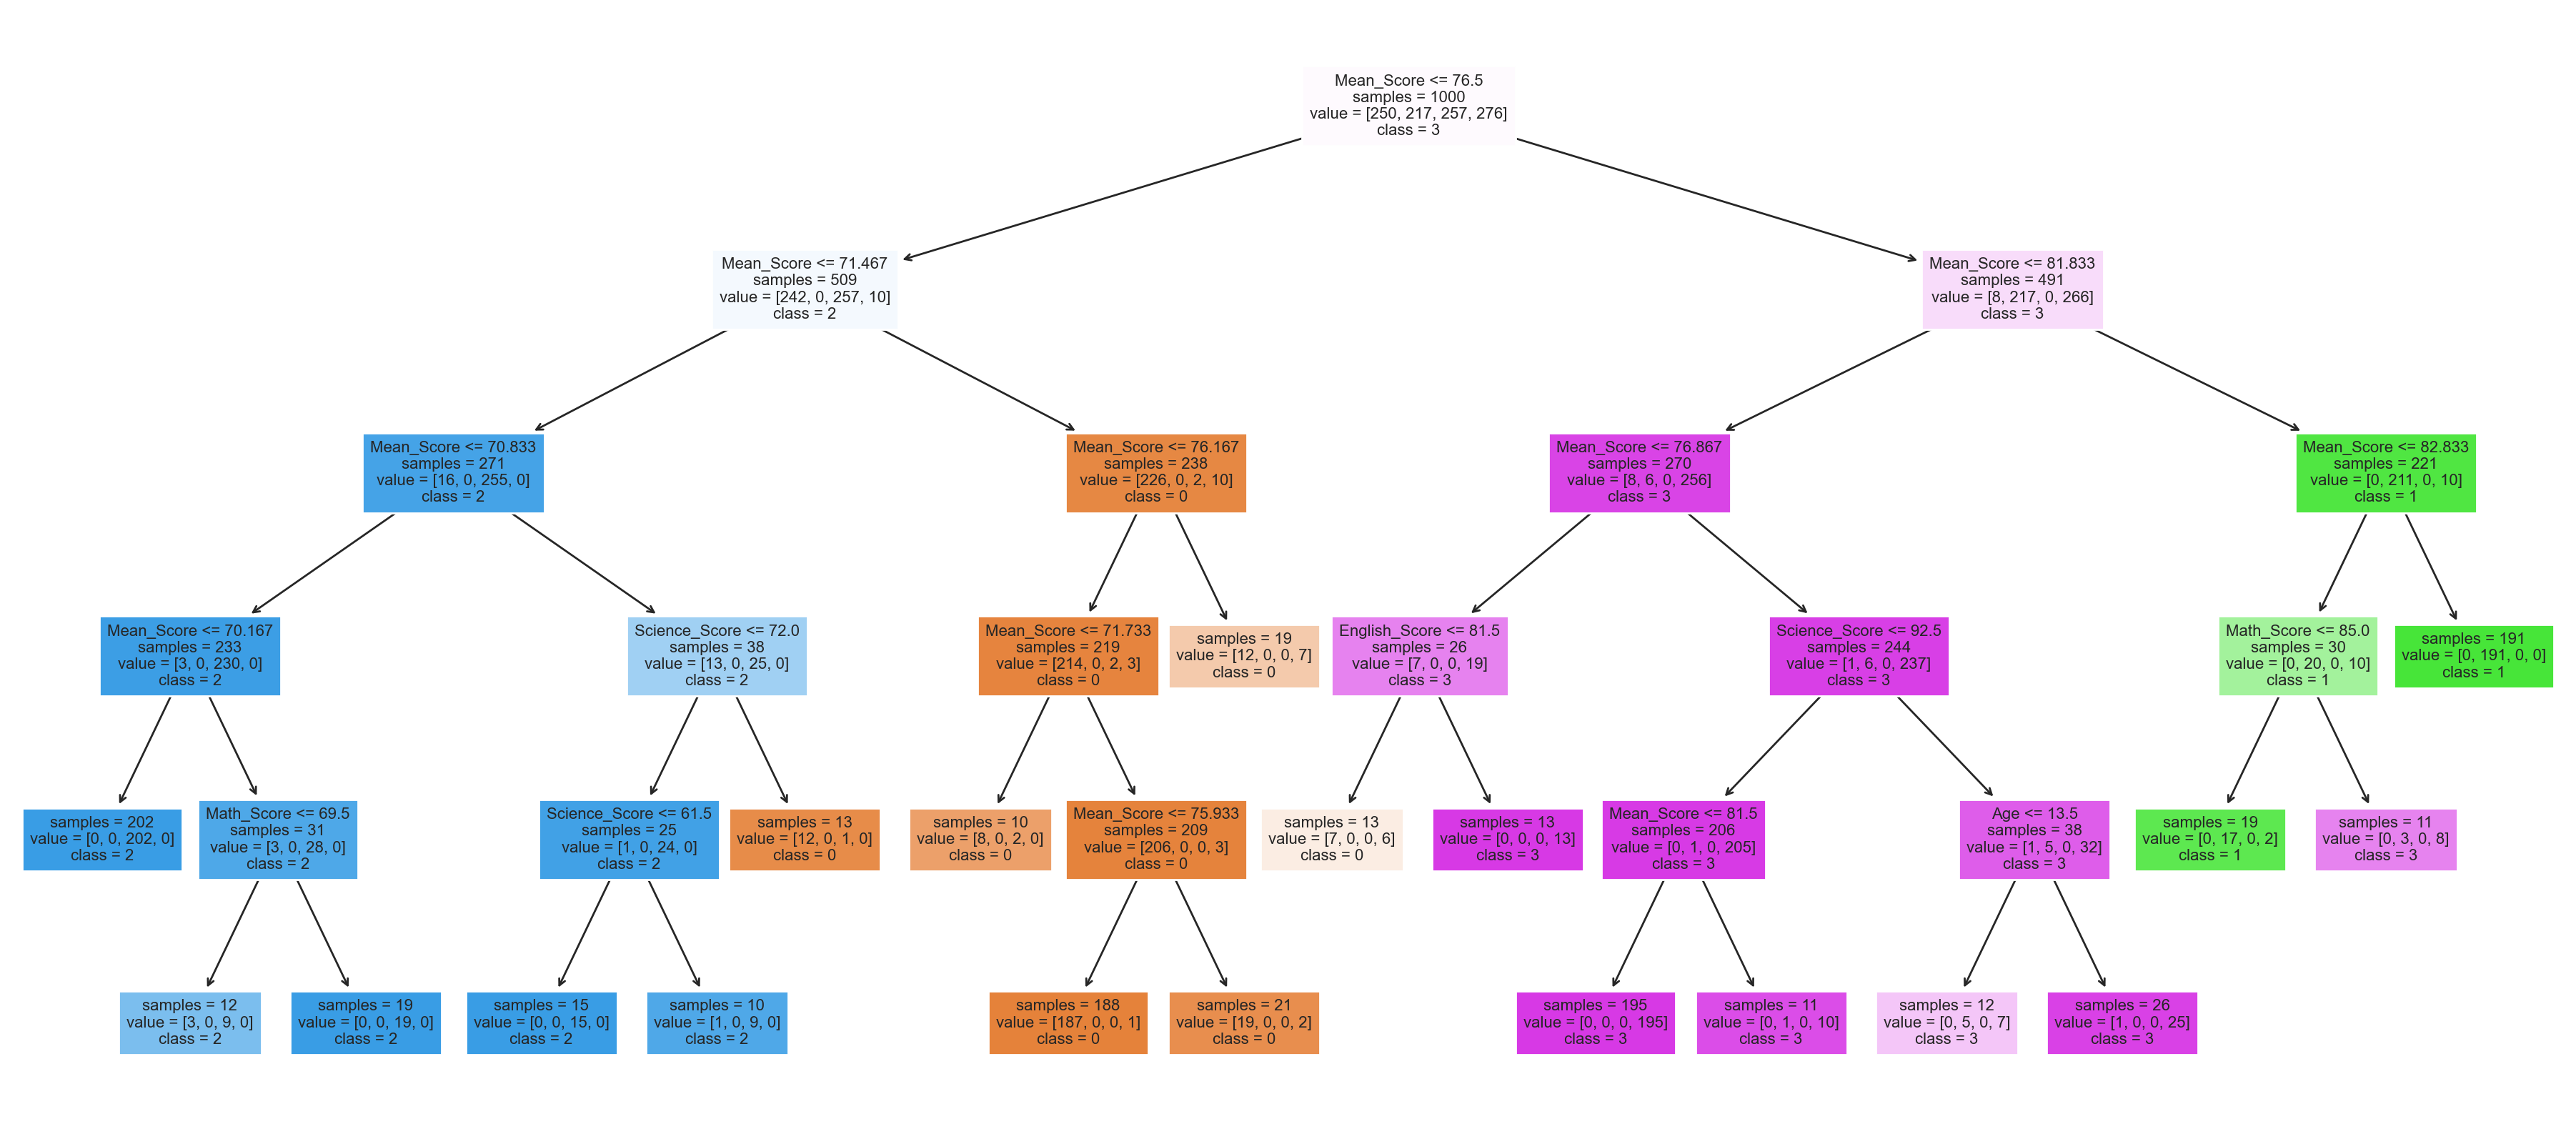

In [848]:
feature_names = df_view.drop(columns="Cluster").columns.tolist()

clf = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10)
clf.fit(df_view.drop(columns="Cluster"), df_view["Cluster"])

fig, ax = plt.subplots(figsize=(23, 10), dpi=200)
plot_tree(
    clf,
    feature_names=feature_names,
    class_names=list(np.unique(df_view["Cluster"].values.astype(str))),
    impurity=False,
    filled=True,
    ax=ax,
    fontsize=8,
)
plt.show()


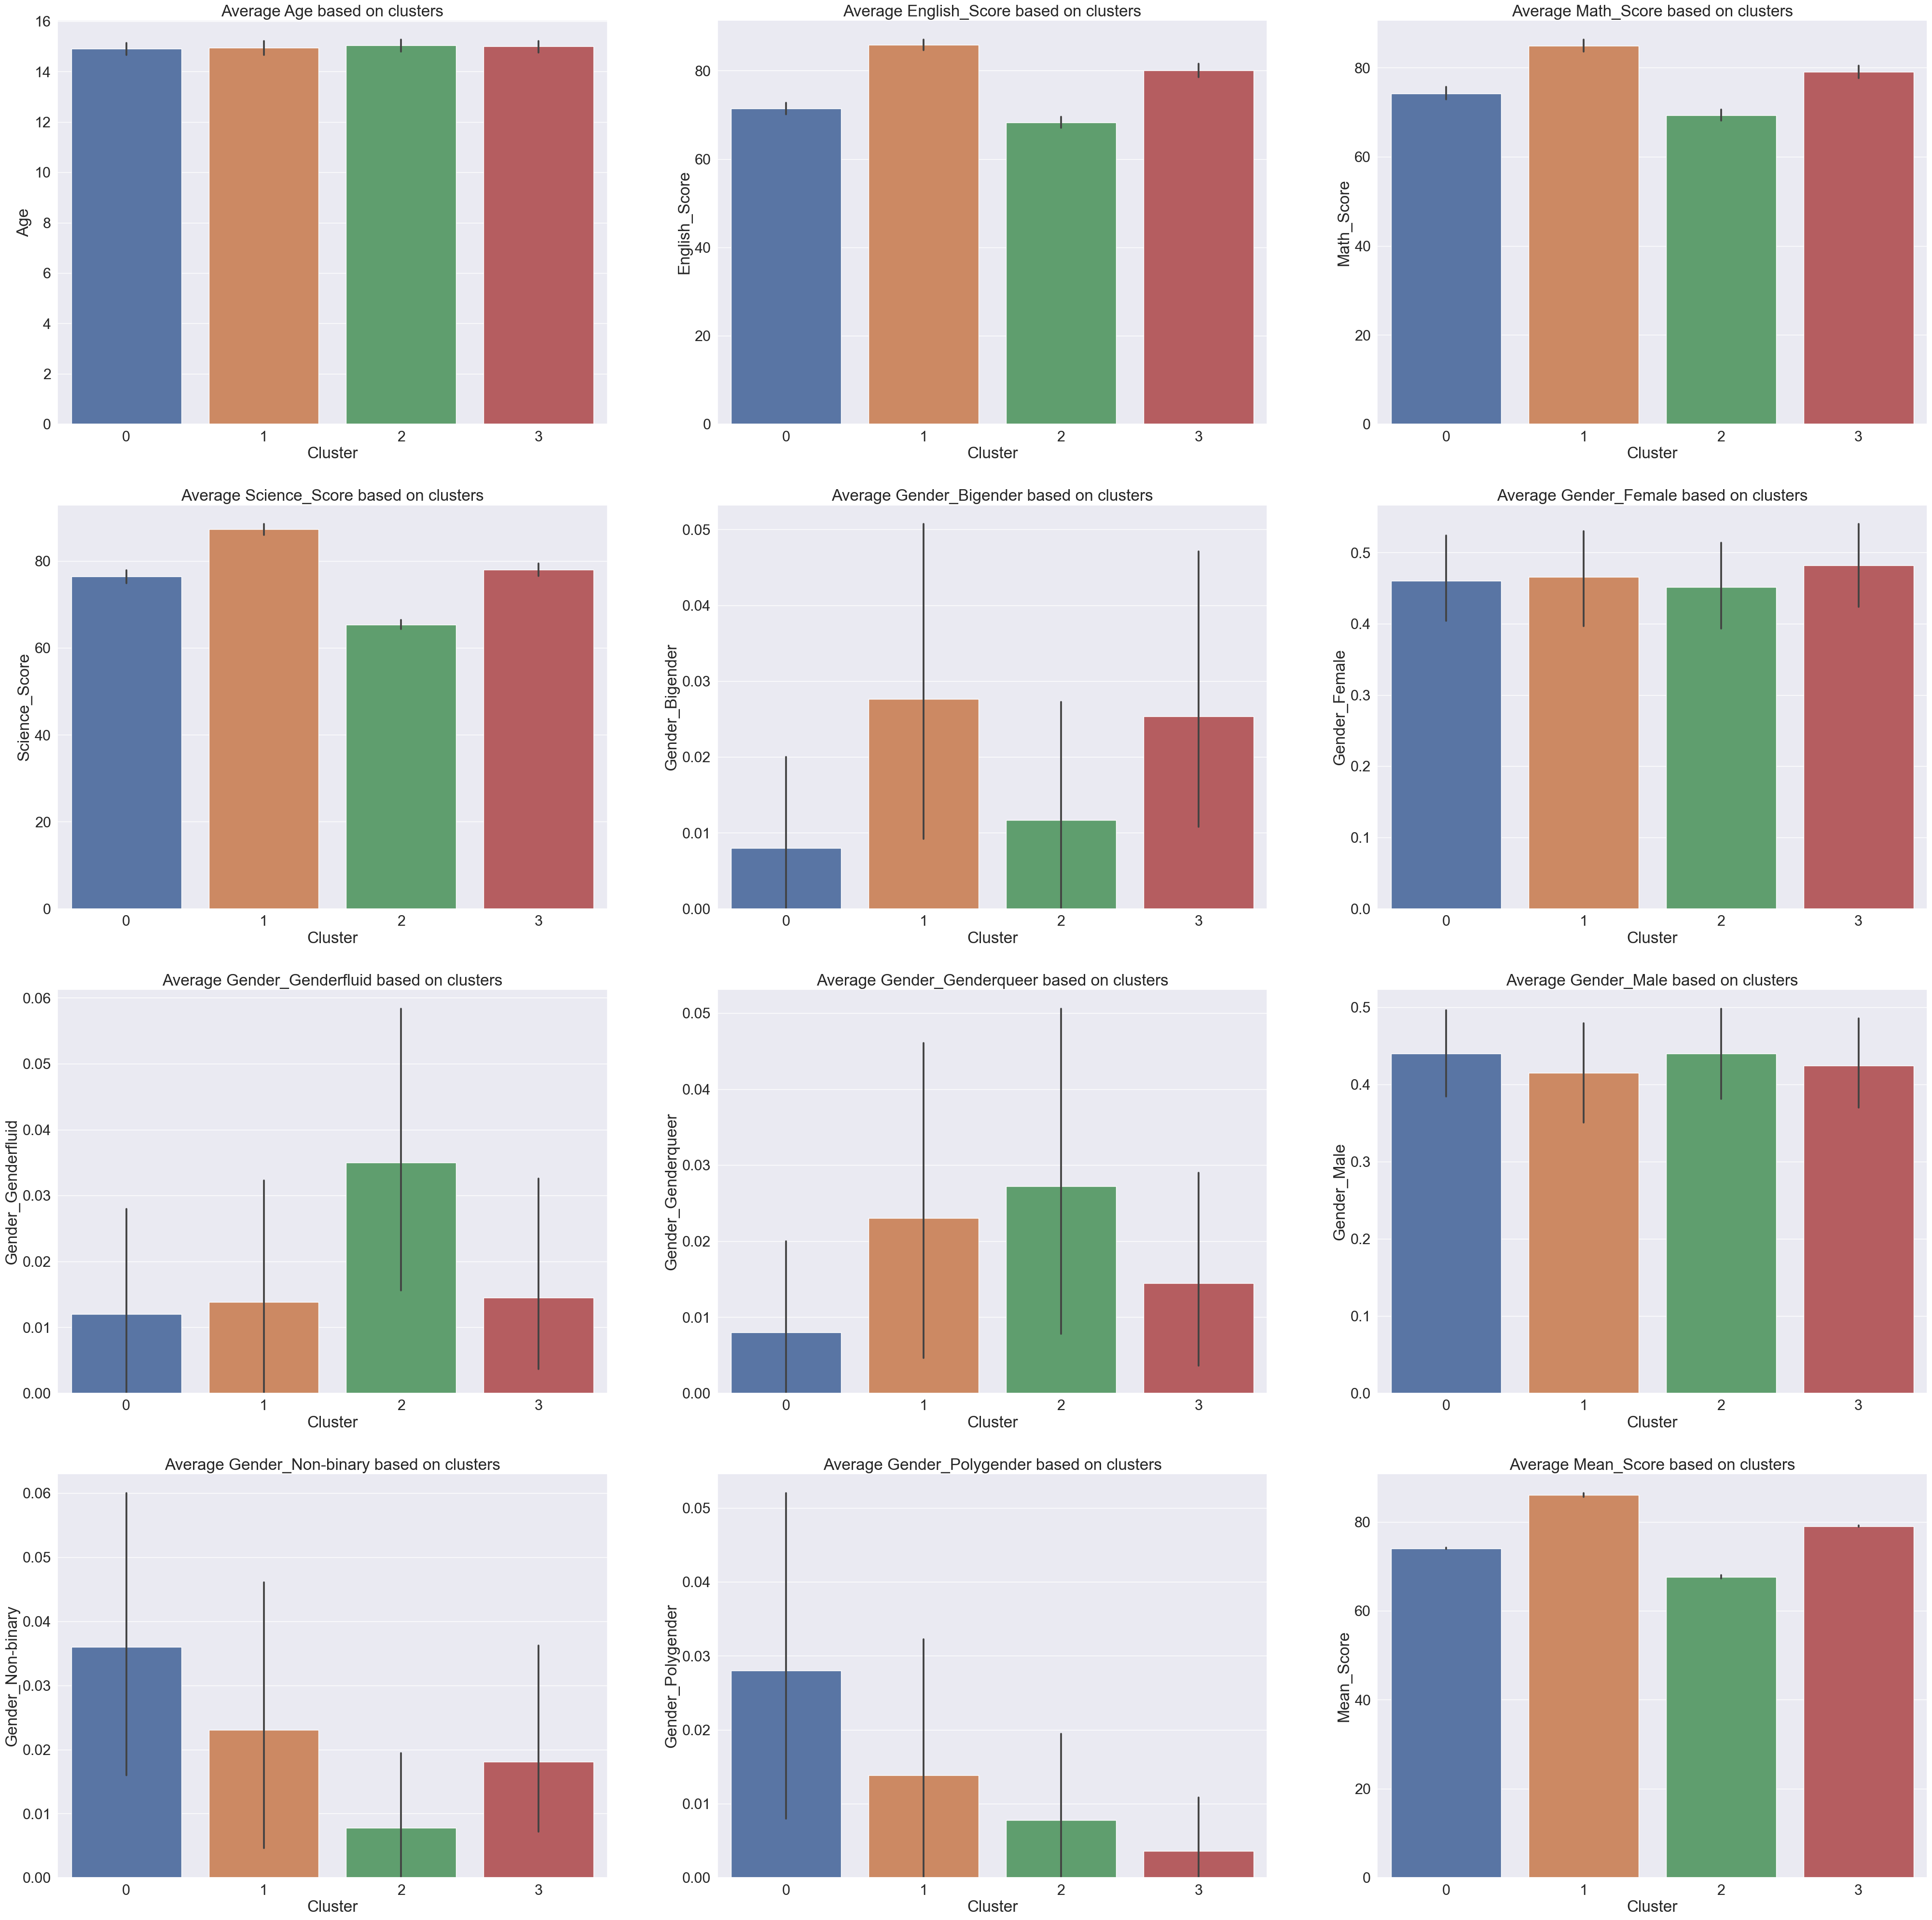

In [843]:
sns.set(font_scale=2)  # Set the font scale
fig, ax = plt.subplots(4, 3, figsize=(50, 50))
kmean_data = df_view.drop(columns="Cluster")

for i in range(len(kmean_data.columns)):
    sns.barplot(
        data=df_view, y=kmean_data.columns[i], x="Cluster", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Average {kmean_data.columns[i]} based on clusters")
plt.show()